***Predicting the quality of red wine if its high, medium or low quality wine based on several physico-chemical features***

### Decision Tree Algorithm

### 1. Load Libraries

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

##### Scikit Learn modules needed for Decision Trees
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

## Below packages are needed for Hyper Parameter Tuning of an Algorithm in Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Plotting libraries
from IPython.display import SVG, display
from graphviz import Source

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline
import plotly.graph_objects as go

### 2. Load Data

In [2]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Preprocessing of Data

In [3]:
# Preprocessing of data
# Creating 3 classes based on quality <= 4 , low; quality > 4 <= 8, medium else high
def create_level(x):
    # function to create levels basis wine quality
    if x <= 5:
        x = "low"
    elif x > 5 and x < 7:
        x = "medium"
    else:
        x = "high"
    return x

In [4]:
df['quality_level'] = df['quality'].apply(lambda x: create_level(x))

In [5]:
print(df.quality.describe())
print(df.quality_level.value_counts())

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
low       744
medium    638
high      217
Name: quality_level, dtype: int64


In [6]:
# Encoding of categorical class variable to integers which will be used for feeding the model
le = LabelEncoder()
qlevel_encoded = le.fit_transform(df['quality_level'])
print((le.classes_))
print(qlevel_encoded)

['high' 'low' 'medium']
[1 1 1 ... 2 1 2]


### 4. Split Data in Training & Testing samples

In [7]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:10], qlevel_encoded,
                                                    test_size=0.20,
                                                    random_state=21)

print('Shape of Training Input Data:{}'.format(x_train.shape))
print(f'Shape of Test Input Data:{x_test.shape}')
print('Shape of Training Output Data:{}'.format(y_train.shape))
print('Shape of Test Output Data:{}'.format(y_test.shape))

Shape of Training Input Data:(1279, 10)
Shape of Test Input Data:(320, 10)
Shape of Training Output Data:(1279,)
Shape of Test Output Data:(320,)


### 5. Build Decision Tree Model

In [8]:
# Build Decision Tree classifier Model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test)*100;#testing the Decision Tree classifier model

# Model diagnostic
print(f"The Score of DT classifier Model is {score}")
print(f"The predicted values from test data are: {y_predicted[:10]}")

The Score of DT classifier Model is 64.6875
The predicted values from test data are: [2 2 1 1 2 0 1 1 1 1]


#### Feature importance 
##### refers to techniques that assign a score to input features based on how useful they are at predicting a target variable

In [9]:
#sklearn.tree.DecisionTreeClassifier.feature_importances_
print(clf.feature_importances_)
#Return the feature importances

[0.09112731 0.15130588 0.09461381 0.07766353 0.06609358 0.0563094
 0.11432288 0.15164181 0.05817057 0.13875123]


In [10]:
variableImp = pd.DataFrame({"Feature":df.columns[:10],"Importance":clf.feature_importances_})

variableImp.head(10)

,Feature,Importance
0,fixed acidity,0.091127
1,volatile acidity,0.151306
2,citric acid,0.094614
3,residual sugar,0.077664
4,chlorides,0.066094
5,free sulfur dioxide,0.056309
6,total sulfur dioxide,0.114323
7,density,0.151642
8,pH,0.058171
9,sulphates,0.138751


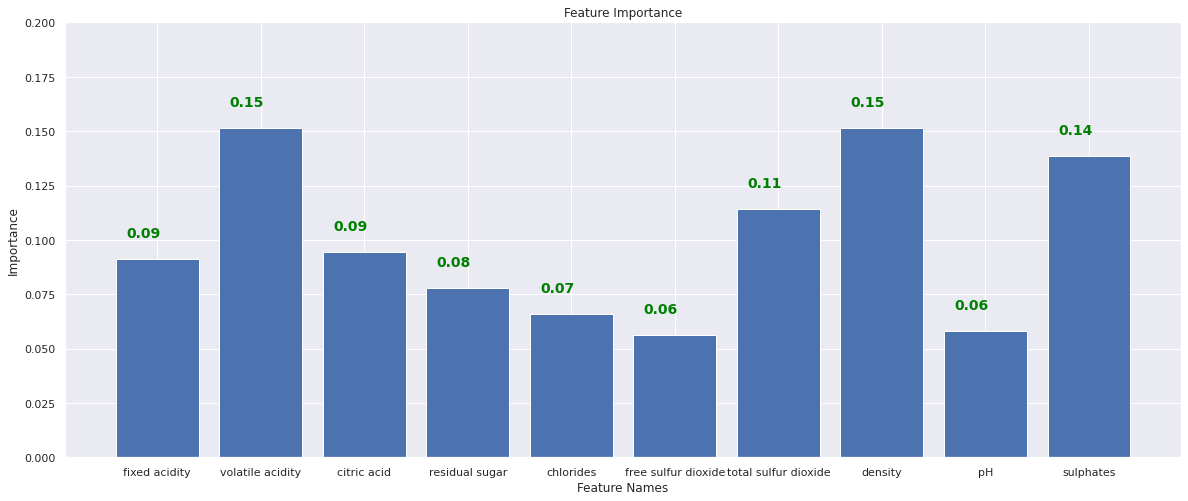

In [11]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(8)
ax.bar(x = variableImp.Feature, height = variableImp.Importance)
ax.set_title('Feature Importance')
ax.set_xlabel('Feature Names')
ax.set_ylabel('Importance')
ax.set_ylim(top = 0.2)
for i, v in enumerate(variableImp.Importance):
    ax.text(i-0.3, v + 0.01, s = np.round(v,2), color='green', fontweight='bold',fontsize=14)

### 6. Predict outcome using the Test Data

In [12]:
# Prediction on Test Data
#Transforming label encoded quality levels to categorical quality levels for predicted test values
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

array(['medium', 'medium', 'low', 'low', 'medium', 'high', 'low', 'low',
       'low', 'low'], dtype=object)

In [13]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

array(['medium', 'medium', 'low', 'medium', 'medium', 'high', 'low',
       'low', 'low', 'low'], dtype=object)

### 7. Confusion Matrix

In [14]:
#Confusion Matrix
#Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels , y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[27,  7, 11],
       [ 5, 99, 40],
       [18, 32, 81]])

In [15]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[27  7 11]
 [ 5 99 40]
 [18 32 81]]
Normalized confusion matrix
[[0.6  0.16 0.24]
 [0.03 0.69 0.28]
 [0.14 0.24 0.62]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


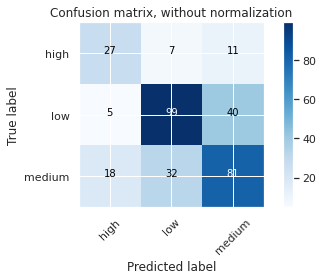

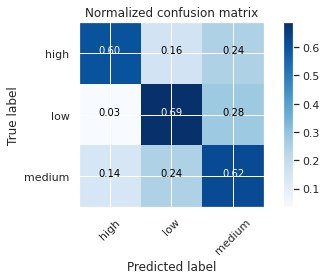

In [16]:
#Without Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Graphviz Windows external library:
https://amicale236.medium.com/pygraphviz-installation-in-windows-f45cc6fed981

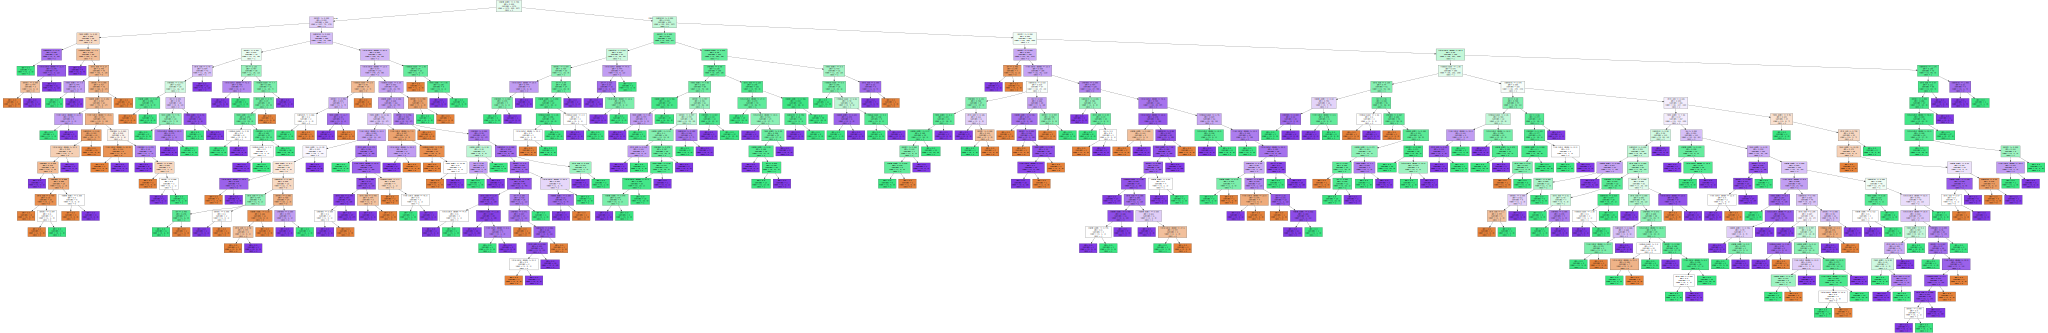

In [17]:
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names = df.columns[0:10], class_names = ['0', '1', '2'] 
   , filled = True))

#graph.format = 'pdf'
#graph.render('dtree_render',view=True)

display(SVG(graph.pipe(format='svg')))

graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names = df.columns[0:10], class_names = ['0', '1', '2'] 
   , filled = True))

graph.format = 'png'

graph.render('dtree_render',view=True)

display(SVG(graph.pipe(format='svg')))

####graphics package may crash you system

In [18]:
tree.export_graphviz(clf,out_file='tree.dot')  

### Problem of Overfitting

- Over-fitting is the phenomenon in which the learning system tightly fits the given training data so much that it would be inaccurate in predicting the outcomes of the untrained data.

<img style="float: left;" src = "https://drive.google.com/uc?id=1LzELFI78UO-k6DM4tut8B17s5mN9-_hf" width="400" height="300">

**Overfitting results** in decision trees that are more complex than necessary. Key reasons:
- Tree growth went too far
- Number of instances gets smaller as we build the tree (e.g., several leaves match a single example)

**Avoid Overfitting** in decision trees:
- Using method of Prunning (Early Stopping Method)
    1. Stop if number of instances is less than some user-specified threshold
    2. Stop if expanding the current node does not improve impurity measures (e.g., GAIN)

#### Defining specific Decision Tree Classifier Parameters

In [19]:
# Build Model
clf1 = DecisionTreeClassifier(criterion= "entropy",max_depth= 6)
clf1.fit(x_train, y_train)
y_predicted1 = clf1.predict(x_test)
score1=clf1.score(x_test,y_test)*100;#testing the DT Classifier model

### Hyper Parameter Tuning

- In contrast to __model parameters__ which are learned during training, __model hyperparameters__ are set by the data scientist ahead of training and control implementation aspects of the model. 
- The __weights learned during training__ of a linear regression model are __parameters__ while the __max height of a tree Decision Tree is a model hyperparameter__ because this is set by the Machine Learning Engineer. 
- __Hyperparameters__ can be thought of as __model settings__. These settings need to be tuned for each problem because the best model hyperparameters for one particular dataset will not be the best across all datasets. 
- The process of hyperparameter tuning (also called __hyperparameter optimization)__ means finding the combination of hyperparameter values for a machine learning model that performs the best - as measured on a validation dataset - for a problem.

<img src="https://drive.google.com/uc?id=1hpnvrk0xuTNeUwdNRkZyQw5AhDy8sqG5" alt="Train & Test Methodology" width="600" height="400">

In [20]:
# Code to check if there are any blank / empty / null values in dataframe
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_level           0
dtype: int64

In [21]:
df.dtypes #checking the datatypes of the dataframe columns

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_level            object
dtype: object

In [22]:
# We create the preprocessing pipelines for numeric data
numeric_features = df.columns[0:10]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])
#num: name of step
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(random_state = 42))])

In [23]:
clf_dt.steps

[('preprocessor',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('imputer', SimpleImputer()),
                                                   ('scaler', MinMaxScaler())]),
                                   Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
         'pH', 'sulphates'],
        dtype='object'))])),
 ('classifier', DecisionTreeClassifier(random_state=42))]

In [24]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__criterion': ["gini","entropy"],
    'classifier__max_depth':[10,20,30,40]
}

grid_search = GridSearchCV(clf_dt, param_grid, cv=10, verbose = 1,n_jobs= -1)
grid_search.fit(x_train, y_train)

score_dt = grid_search.score(x_test, y_test)*100

print(("\n Best Model from grid search has score: %.2f"
       % score_dt))
# Print your best combination of hyper parameters
print("\n Optimum setting of hyperparameters:")
grid_search.best_params_

Fitting 10 folds for each of 32 candidates, totalling 320 fits

 Best Model from grid search has score: 66.88

 Optimum setting of hyperparameters:


{'classifier__criterion': 'entropy',
 'classifier__max_depth': 30,
 'preprocessor__num__imputer__strategy': 'mean',
 'preprocessor__num__scaler': MinMaxScaler()}

In [25]:
import joblib
joblib.dump(grid_search,"DecisionTree.model")

['DecisionTree.model']

In [26]:
class_models = ["dt_default","dt_specific_tuned","dt_hypertuned"]
fig = go.Figure([go.Bar(x=class_models,y=[score,score1,score_dt],
                       width = 0.5)])

fig.update_layout(title = 'Wine Quality Prediction',
                 plot_bgcolor = 'grey',
                 xaxis = dict(showgrid = False), yaxis = dict(showgrid = False),
                 xaxis_title = "Decision Tree Classifier Models",
                 yaxis_title = "Accuracy")
fig.show()